# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcción de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de México a través de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de público. Posee una serie de centros de distribución (CDs) para la entrega de sus productos, la mayoría de ellos situados en el estado de Mexico.

Para gestionar su alcance, así como la facturación de su sector en tiendas online, consolida los datos en diferentes períodos de tiempo y evalúa estos datos para generar insights y tomar decisiones estratégicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el año 2023.

Tú, como analista de datos de la empresa, necesitarás generar visualizaciones que ayuden en la elaboración de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un rápido análisis de la clientela que tenemos en la tienda virtual y de la facturación de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar información a través de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturación, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el código identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el código identificador de la compra.

Estos datos se leerán desde el repositorio compartido en GitHub.

**Desafío**

Tú, como analista de datos del equipo de datos de Zoop, tienes el desafío de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentación de los resultados de Zoop en 2023. Para ello, se te presentarán 7 preguntas para que puedas contribuir en la construcción del storytelling de las ventas de la empresa.

Para agilizar el proceso de análisis exploratorio de datos (AED) y la creación de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los análisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [1]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Después de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una pequeña verificación en las tablas extraídas.

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore') # Permite filtrar todas las advertencias. "sirve para ocultar los mensajes de advertencia (warnings) que normalmente aparecerían cuando se ejecuta código en Python."
# Un warning (advertencia) no es un error, pero indica algo que podría causar problemas o que no es recomendable. Por ejemplo:
#Usar funciones obsoletas.
#Operaciones numéricas con divisiones por cero que no causan error inmediato.
#Comportamientos no deseados o inseguros.

#¿Qué hace exactamente esta línea?
#Importando el módulo warnings y usando filterwarnings('ignore') se le está diciendo a Python:
#“Ignora todos los mensajes de advertencia que normalmente me mostrarías.”
#Esto no detiene la ejecución del código, pero oculta estos avisos del usuario.

In [3]:
clientes = pd.read_csv(url_clientes) # Creamos el dataframe de clientes
#ventas = pd.read_csv(url_ventas)

In [4]:
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [5]:
ventas = pd.read_csv(url_ventas) # Creamos el dataframe de ventas

In [6]:
ventas.tail()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito


## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y cómo podemos relacionarlos en la construcción de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y región de la compra, edad, sexo biológico, si participan en el programa de cashback y la calificación, o nota, de la compra.

Queremos hacer una breve exploración de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya están limpios y tratados. Construye el código para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1 # Mostrar las primeras 5 filas del DataFrame para tener una idea general de la estructura
clientes.head()


,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [8]:
2# Mostrar la cantidad de filas y columnas (dimensiones del DataFrame)
clientes.shape

(6169, 9)

In [9]:
3# Mostrar información general: nombres de columnas, tipos de datos y valores no nulos
clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [10]:
4# Generar estadísticas descriptivas para columnas numéricas (como edad y nota)
clientes.describe()

,ID_compra,ID_cliente,edad,nota
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [11]:
5# Contar cuántas ciudades distintas hay en la base
clientes['ciudad'].nunique()

94

In [12]:
6# Contar cuántos estados distintos hay en la base
clientes['estado'].nunique()

28

In [13]:
7# Contar la cantidad de registros por cada región
clientes['region'].value_counts()

,count
region,
Centro,1540
Noroeste,1276
Noreste,907
Occidente,556
Centro-Norte,533
Golfo,411
Centro-Sur,383
Sur,284
Sureste,279


In [14]:
8# Contar cuántos clientes hay por cada categoría de sexo biológico
clientes['sexo_biologico'].value_counts()

,count
sexo_biologico,
Femenino,3371
Masculino,2798


In [15]:
9# Contar cuántos clientes participan o no en el programa de cashback
clientes['cashback'].value_counts()


,count
cashback,
No,3557
Sí,2612


In [16]:
10# Contar cuántas veces aparece cada calificación de compra (nota)
clientes['nota'].value_counts().sort_index()

,count
nota,
0,32
1,33
2,58
3,60
4,113
5,90
6,135
7,689
8,923


### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electrónico, que son: ID de la compra, fecha de la compra, hora de la compra, categoría del producto, precio unitario del producto, cantidad vendida, envío y el método de pago.

Queremos hacer una breve exploración de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base también están limpios y tratados. Construye el código para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Mostrar las primeras 5 filas del DataFrame para ver la estructura general
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [43]:
# Convertir la columna 'fecha_compra' a formato datetime
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [21]:

# Mostrar el número de filas y columnas del DataFrame
ventas.shape

(6169, 8)

In [22]:
# Ver información general sobre las columnas, tipos de datos y valores no nulos
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [23]:

# Ver estadísticas descriptivas para columnas numéricas (precio, cantidad, envío)
ventas.describe()

,ID_compra,precio_unitario,cantidad,envio
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,873.234738,3.004863,119.233832
std,1780.981237,1852.064342,1.420725,366.149225
min,1.000000,2.900000,1.000000,0.000000
25%,1543.000000,44.900000,2.000000,0.320000
50%,3085.000000,93.900000,3.000000,7.550000
75%,4627.000000,221.900000,4.000000,29.240000
max,6169.000000,8000.000000,5.000000,4521.540000


In [24]:
# Ver cuántas categorías de productos existen
ventas['categoria'].value_counts()

,count
categoria,
Alimentos y bebidas,1495
Belleza e higiene,1062
Casa y aseo,1041
Electrodomésticos,665
Electrónicos,580
Papelería y oficina,551
Herramientas y construcción,474
Libros,301


In [25]:
# Ver cuántos métodos de pago fueron utilizados y su frecuencia
ventas['metodo_pago'].value_counts()

,count
metodo_pago,
Tarjeta de Crédito,2851
Transferencia,2244
Tarjeta de Débito,547
Paypal,527


In [26]:
# Revisar los días del año con más ventas: extraer día de la semana de la columna de fecha
ventas['fecha'] = pd.to_datetime(ventas['fecha'])
ventas['horario'] = ventas['fecha'].dt.day_name()

In [27]:
# Conteo de ventas por día de la semana
ventas['horario'].value_counts()

,count
horario,
Saturday,1091
Sunday,1062
Friday,1014
Thursday,1007
Wednesday,999
Tuesday,996


In [28]:
# Crear una nueva columna con el valor total de cada venta (precio unitario * cantidad + envío)
ventas['valor_total'] = ventas['precio_unitario'] * ventas['cantidad'] + ventas['envio']

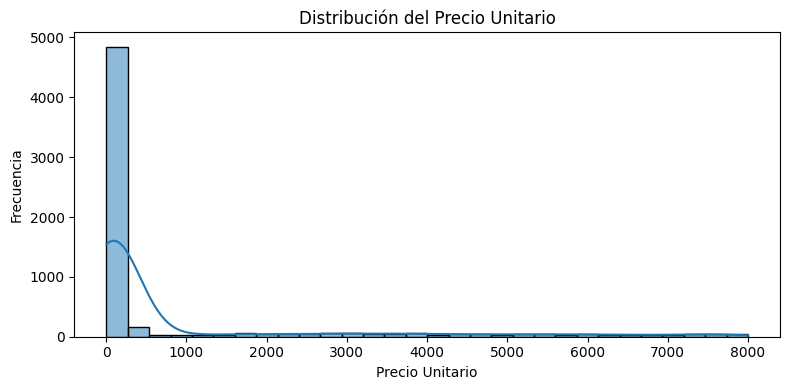

In [29]:
# Visualización: Distribución del precio unitario
plt.figure(figsize=(8, 4))
sns.histplot(ventas['precio_unitario'], bins=30, kde=True)
plt.title('Distribución del Precio Unitario')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## **1.4 - Tipos de gráficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcción de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro análisis consolidando los datos en una única tabla para, a partir de ahí, enfocarnos en las posibilidades de visuales combinando los datos. ¿Podrá GPT ayudarnos aquí?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Además, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un código para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [30]:
1# Unir los DataFrames clientes y ventas usando la columna 'ID_compra' como llave
2# Se usa inner join para conservar solo las compras que están en ambas bases
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

3# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    'ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario',
    'cantidad', 'envio', 'metodo_pago', 'ID_cliente', 'edad',
    'sexo_biologico', 'ciudad', 'estado', 'region', 'cashback', 'nota']

df = df[columnas_ordenadas]

In [31]:
4# Ver las primeras filas del DataFrame unificado para confirmar
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,Tuesday,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,Tuesday,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,Tuesday,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,Tuesday,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,Tuesday,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generación de visuales que puedan ayudar en el análisis de la facturación a lo largo del año, el perfil del cliente y otros datos que puedan ser relevantes para el análisis y la construcción de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: número único asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categoría del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de envío a ser pagado en total de la compra, en formato float
* metodo_pago: método de pago de la compra, en formato object
* ID_cliente: número único asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biológico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: región del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluación del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el análisis de los datos de los clientes y ventas de Zoop.

Con base en la información proporcionada, ¿qué tipos de visualizaciones serían útiles para alcanzar el objetivo de analizar los datos?

# **Sugerencias de visualizaciones en CHATGPT**

Análisis de Facturación y Ventas a lo Largo del Año
Objetivo: identificar patrones de ingresos y volumen de ventas a lo largo del tiempo para apoyar decisiones comerciales y de marketing.

🔹 Facturación mensual total (gráfico de líneas o barras)
Qué muestra: el ingreso total por mes.

Por qué es útil: revela los meses con mayor o menor facturación, detecta estacionalidades (por ejemplo, promociones navideñas o caídas en ciertos trimestres).

🔹 Cantidad de compras por mes (gráfico de barras)
Qué muestra: el número de compras (ID_compra únicos) realizadas cada mes.

Por qué es útil: permite evaluar el volumen de operaciones, independientemente del valor monetario, para analizar el ritmo de ventas.

🔹 Ingresos por categoría de producto (barras verticales u horizontales)
Qué muestra: la suma total facturada por cada categoría de producto.

Por qué es útil: ayuda a entender qué productos generan más ingresos y cuáles podrían necesitar apoyo comercial o revisión.

🔹 Ingresos por método de pago (pie chart o barras)
Qué muestra: el valor total de ventas segmentado por método de pago.

Por qué es útil: permite analizar preferencias de pago de los clientes y considerar estrategias (descuentos por ciertos medios, alianzas, etc.).

👥 2. Perfil del Cliente
Objetivo: comprender las características demográficas y comportamentales de los clientes para segmentarlos y personalizar estrategias.

🔹 Distribución de edades (histograma o KDE plot)
Qué muestra: cómo se distribuyen las edades de los compradores.

Por qué es útil: permite identificar el grupo etario predominante (jóvenes, adultos, seniors), y ajustar comunicación, productos y campañas.

🔹 Distribución por sexo biológico (pie chart o barras)
Qué muestra: proporción de hombres y mujeres (u otras categorías) que compran en la tienda.

Por qué es útil: clave para analizar la diversidad del público y adaptar campañas de marketing.

🔹 Participación en programa de cashback (pie chart o barras)
Qué muestra: cuántos clientes están inscritos o no en el programa de recompensas.

Por qué es útil: ayuda a evaluar el alcance del programa y su posible relación con la fidelización o la satisfacción.

🔹 Edad promedio por región o estado (barras agrupadas o mapa de calor)
Qué muestra: promedio de edad por zonas geográficas.

Por qué es útil: muestra diferencias entre perfiles demográficos por ubicación, útil para campañas regionales o expansión.

🛒 3. Hábitos de Compra
Objetivo: identificar cómo y cuándo compran los clientes para optimizar campañas, logística y experiencia del cliente.

🔹 Frecuencia de compras por día de la semana (barras)
Qué muestra: en qué días hay más ventas.

Por qué es útil: permite identificar los mejores días para promociones y planificación operativa (como envíos o soporte).

🔹 Horario de compra más frecuente (histograma o barras por hora)
Qué muestra: en qué horas del día ocurren más compras.

Por qué es útil: útil para acciones en tiempo real (como notificaciones automáticas o marketing personalizado).

🔹 Distribución de la cantidad de productos por compra (histograma o boxplot)
Qué muestra: número de unidades compradas por transacción.

Por qué es útil: evalúa el comportamiento de compra (mínimas vs mayoristas, por ejemplo) y posibles oportunidades de upselling.

🔹 Nota promedio por categoría (gráfico de barras)
Qué muestra: la calificación promedio que los clientes otorgan a productos de cada categoría.

Por qué es útil: permite identificar qué tipos de productos generan mayor o menor satisfacción.

📦 4. Indicadores Económicos y Comportamiento
Objetivo: obtener métricas clave de negocio y encontrar patrones o relaciones entre variables clave.

🔹 Ticket promedio por mes o categoría
Qué muestra: promedio del valor pagado por compra, ya sea mensual o por categoría.

Por qué es útil: una métrica clave para evaluar el valor medio del cliente, y cómo varía según el tiempo o tipo de producto.

🔹 Facturación por región o estado (barras o mapas)
Qué muestra: los ingresos totales agrupados geográficamente.

Por qué es útil: detecta zonas de alto rendimiento o baja penetración, útil para decisiones logísticas y comerciales.

🔹 Relación entre edad del cliente y nota (gráfico de dispersión)
Qué muestra: cómo varía la satisfacción (nota) según la edad del cliente.

Por qué es útil: puede revelar diferencias generacionales en la percepción de servicio, producto o experiencia.

🔹 Relación entre cantidad comprada y valor total (gráfico de dispersión)
Qué muestra: cómo se relaciona el volumen comprado con el gasto total.

Por qué es útil: evalúa si los clientes compran mucho a bajo precio o poco con alto valor (estrategias de precios).

🎯 Extras recomendados para dashboards
Top 10 ciudades con más ventas
→ ideal para visualizar distribución geográfica de la demanda.

Categorías más vendidas por región
→ útil para análisis segmentado y personalización de inventario o campañas.

Frecuencia de uso de cada método de pago
→ mide la penetración de medios electrónicos, tarjetas, pagos digitales, etc.

## HAGA LO QUE HICIMOS - ZOOP PAY

In [32]:
import pandas as pd

1 # Cargar los datos desde las URLs
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

# Verificar nombres de columnas y tipos si es necesario
# print(clientes.columns)
# print(ventas.columns)

In [33]:
# Unir las bases de ventas y clientes por ID_compra
df = pd.merge(ventas, clientes, on="ID_compra", how="inner")

# Renombrar columnas si es necesario para cumplir el orden especificado
#df.rename(columns={
   # 'hora_compra': 'hora',
    #'categoria': 'categoría',
    #'sexo': 'sexo_biologico',
    #'metodo_pagamento': 'metodo_pago',
    # 'idade': 'edad'
#}, inplace=True)

In [34]:
clientes
ventas

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia
...,...,...,...,...,...,...,...,...
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito


In [35]:
# Reordenar las columnas en la secuencia deseada
columnas_ordenadas = ["ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad", "envio", "metodo_pago",
                      "ID_cliente", "edad", "sexo_biologico", "ciudad", "estado", "region", "cashback", "nota"]

df = df[columnas_ordenadas]

In [36]:

# Visualizar las primeras filas del DataFrame final
df.head()


,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


#### Ahora, vamos a la segunda parte del problema, concatenando este DataFrame creado con la base Zoop Pay y ajustando la columna de fecha a formato datetime. Por lo tanto, podemos utilizar el siguiente prompt para la resolución de estos procesos:

In [37]:
# Convertir la columna 'fecha' a datetime
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d")

# Unir con zoop_pay usando 'ID_cliente'
df = pd.merge(df, zoop_pay, on="ID_cliente", how="left")

# Mostrar primeras filas
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota,zoop_pay
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10,No
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8,Sí
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7,No
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9,Sí
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9,No


# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creación de los gráficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creación de los visuales, no vamos a seguir todas las sugerencias aquí mencionadas.

Queda como una sugerencia para ayudarte cuando estés trabajando con otras bases y tengas dificultades para pensar en qué visualizaciones podrías construir.

**Observación:** Recordando que es muy probable que los gráficos que se me señalaron, no sean necesariamente los mismos que aparecerán para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Después de la etapa de exploración de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. Así, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¿Cuáles fueron los métodos de pago más utilizados en 2023?
2. ¿Cuál fue la facturación por categoría en 2023?
3. ¿Cómo fueron las ventas a lo largo de los meses en 2023?
4. ¿Cómo se divide la venta por trimestre por método de pago? ¿Existe un período en que algún tipo de pago se destaca?


#### Perfil del cliente

5. ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?
6. ¿Cómo están distribuidas las evaluaciones del producto? ¿Tenemos buenos números generales?
7. ¿Cómo se distribuye nuestro público por edad y sexo biológico? ¿Existe un grupo que se destaca?

Inicialmente, vamos a hacer la primera versión de los gráficos, aún no refinados con los elementos visuales, para más adelante ir añadiendo las diversas técnicas de storytelling.

### **1ra Pregunta:** ¿Cuáles fueron los métodos de pago más utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcción de este visual. Primero, trataremos los datos generando una tabla resumida (que también es una especie de visual) y luego construiremos el primer gráfico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cuáles métodos de pago fueron los más utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuación, deseamos crear una visualización que muestre la cantidad de esos métodos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear tabla resumen de métodos de pago
metodos_de_pago = df["metodo_pago"].value_counts().reset_index()
metodos_de_pago.columns = ["metodo_pago", "cantidad"] # seleccionamos las dos columnas metodo de pago y cantidad
metodos_de_pago

#df["metodo_pago"]: selecciona la columna de métodos de pago del DataFrame.
#.value_counts(): cuenta cuántas veces aparece cada método.
#.reset_index(): convierte la serie resultante en un DataFrame.

,metodo_pago,cantidad
0,Tarjeta de Crédito,2851
1,Transferencia,2244
2,Tarjeta de Débito,547
3,Paypal,527


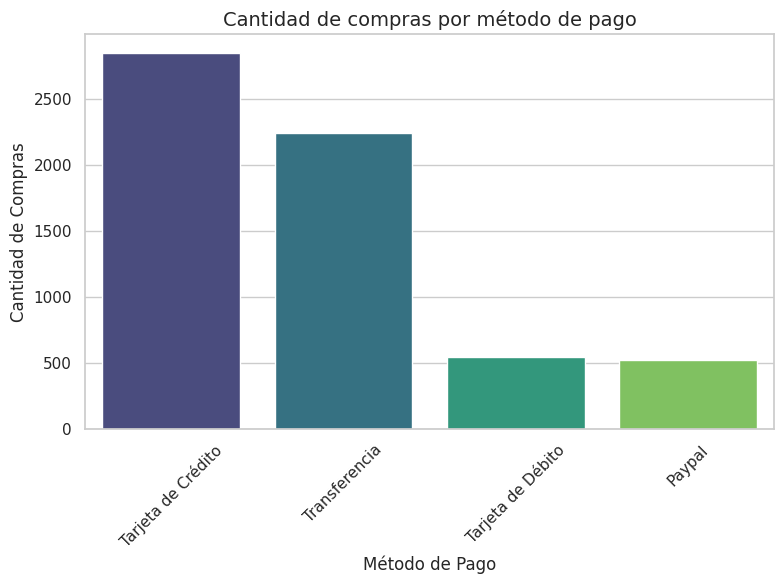

In [39]:
#Configurar estilo visual
sns.set(style="whitegrid")

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=metodos_de_pago, x="metodo_pago", y="cantidad", palette="viridis")

# Títulos y etiquetas
plt.title("Cantidad de compras por método de pago", fontsize=14)
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gráfico, por la forma en que presentamos los datos a ChatGPT, logró representar con éxito un visual que muestra la información deseada. Un gráfico de barras es realmente ideal para representar las cantidades de una o más categorías de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro público y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¿Cuál fue la facturación por categoria em 2023?

**Observación:** Para la facturación, consideraremos aquí el producto entre el precio unitario y la cantidad, sumados al costo de envío de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras horizontales que muestre la facturación por categoría de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categorías de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de envío total de la compra.

Deseamos crear una visualización que muestre la facturación de cada categoría, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el costo de envío.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


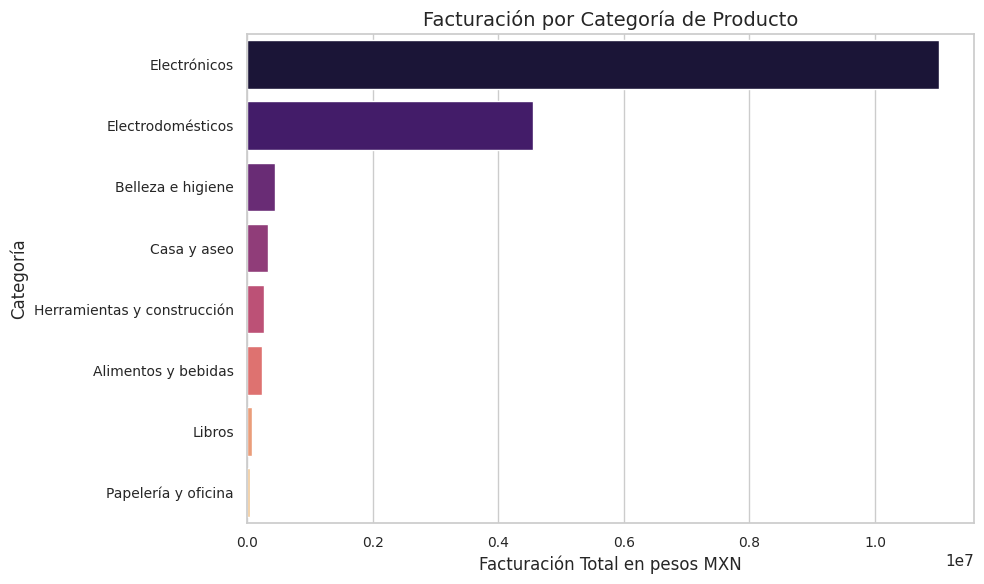

In [40]:
# Crear una nueva columna llamada 'facturacion' con la fórmula indicada
df["facturacion"] = (df["precio_unitario"] * df["cantidad"]) + df["envio"]

# Agrupar los datos por categoría y sumar la facturación de cada una
facturacion_categoria = df.groupby("categoria")["facturacion"].sum().reset_index()

# Ordenar de mayor a menor facturación
facturacion_categoria = facturacion_categoria.sort_values(by="facturacion", ascending=False)

# Configurar el estilo de visualización
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=facturacion_categoria, y="categoria", x="facturacion", palette="magma", orient='h')

# Personalizar el gráfico
plt.title("Facturación por Categoría de Producto", fontsize=14)
plt.xlabel("Facturación Total en pesos MXN", fontsize=12)
plt.ylabel("Categoría", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aquí especificamos el tipo de gráfico, guiando a ChatGPT en la creación de nuestro visual. Podemos notar que en un gráfico de barras el enfoque está más centrado en las categorías, además de ser una forma más fluida de leer textos que podrían ser demasiado extensos para un gráfico de columnas.


### **3a Pregunta:** ¿Cómo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de líneas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturación: calculada como el producto del precio unitario y la cantidad, sumado al costo de envío de cada venta.

Deseamos crear una visualización que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del índice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gráfico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


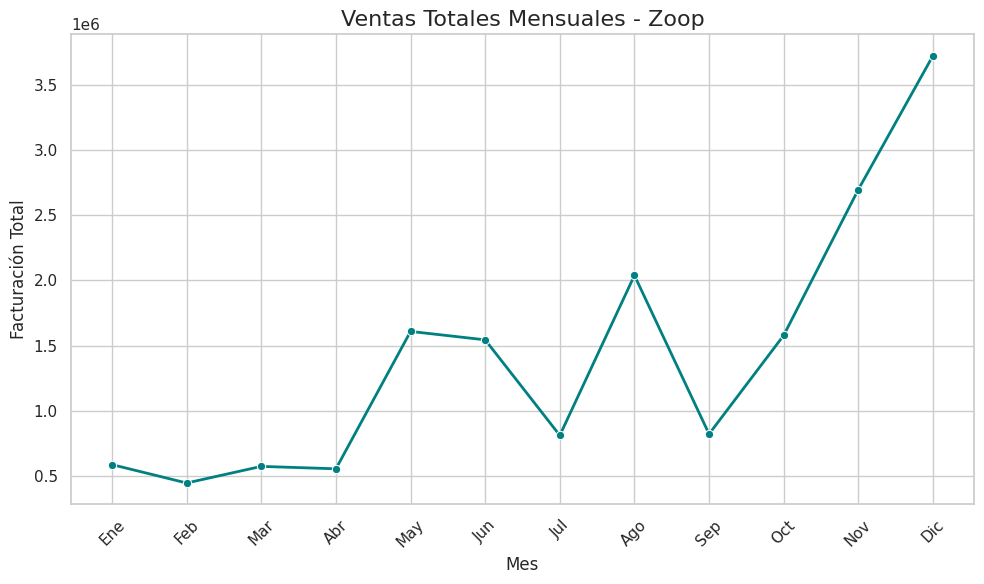

In [41]:
# Asegurar que la columna 'fecha' esté en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear columna con el primer día del mes de cada fecha para agrupar por mes
df['mes_completo'] = df['fecha'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mes y sumar la facturación total
ventas_mensuales = df.groupby('mes_completo')['facturacion'].sum().reset_index()

# Crear columna "mes" con nombre del mes traducido usando el diccionario
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Extraer nombre del mes en inglés y traducir
ventas_mensuales['mes'] = ventas_mensuales['mes_completo'].dt.strftime('%B').map(meses)

# Crear columna auxiliar para eje x con año y mes traducido
ventas_mensuales['etiqueta_mes'] = ventas_mensuales['mes_completo'].dt.strftime('%Y-') + ventas_mensuales['mes']

# Configurar estilo de visualización
sns.set(style='whitegrid')

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o', linewidth=2, color='teal', sort= False)

# Personalizar gráfico
plt.title('Ventas Totales Mensuales - Zoop', fontsize=16)
plt.xlabel('Mes')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

#df['mes_completo']: Normaliza cada fecha al primer día del mes para agrupar correctamente.
#groupby('mes_completo'): Agrupa y suma las ventas del mes.
#strftime('%B'): Obtiene el nombre del mes en inglés.
#.map(meses): Traduce al español abreviado.
#sns.lineplot(...): Dibuja el gráfico de líneas.

<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de períodos en nuestros datos, vale la pena recurrir a gráficos de líneas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gráfico de columnas, por ejemplo, reduciría la percepción de la secuencia de los datos. Las líneas ofrecen una mayor sensación de continuidad.

Siéntete libre de formular algunas hipótesis sobre los momentos de alta y baja en las compras.


## HAGA LO QUE HICIMOS - VISUALIZACIÓN DE DATOS

Gráfico de columnas apiladas

Aprendimos en el video anterior a construir un gráfico de columnas apiladas para la composición de datos con el apoyo del ChatGPT. ¿Qué te parece si aprendemos también otro tipo de visualización que combine la composición y comparación de datos a través de un problema?

La directiva de Zoop está preocupada por las categorías con menor facturación anual en su e-commerce y, por eso, le gustaría entender el desempeño de esas categorías de manera aislada. Para esto, recibimos la demanda de explorar la facturación trimestral investigando cómo está el equilibrio de estas ventas por cada categoría.

Para resolver este problema, vamos a agrupar las 3 categorías con las menores facturaciones anuales, separándolas por trimestre mediante un gráfico de columnas agrupadas.

¿Por qué un gráfico de columnas agrupadas?

Un gráfico de columnas agrupadas es ideal para comparar categorías diferentes en relación con una variable (puede ser temporal o no), mostrando cómo los valores se comparan dentro de cada categoría en columnas separadas, facilitando la visualización de patrones y diferencias entre grupos.

A continuación, vamos a pedir ayuda al ChatGPT para construir esta visualización mediante el siguiente prompt:

Tenemos un DataFrame llamado "df" y queremos construir una visualización de un gráfico de columnas agrupadas lado a lado que presente las ventas por trimestre en relación con las categorías de los productos.

En "df", tenemos las columnas:

trimestre: con las fechas en trimestres de las compras
faturamento: con los valores de las ventas
categoria: con las categorías de los productos vendidos. Vamos a utilizar solo las categorías "Papelería y oficina", "Libros" y "Alimentos y bebidas".
Deseamos crear una visualización que presente las ventas por trimestre ("facturacion"), agrupando las categorías lado a lado en relación con el trimestre correspondiente a cada compra.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización."""

El código generado por el prompt fue el siguiente:

In [ ]:
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
df['trimestre'] = df['fecha'].dt.to_period('Q')
# Suponiendo que ya tienes el DataFrame df
# Filtrar las categorías deseadas
categorias_deseadas = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df['categoria'].isin(categorias_deseadas)]
# Pivotar los datos para tener los trimestres como índice y las categorías como columnas
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categoria', values='facturacion', aggfunc='sum')
# Crear el gráfico de columnas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
# Agregar etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas por Trimestre y Categoría')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
# Mostrar el gráfico
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

#### Desafío: generando visualizaciones con respecto a la localización

¿Vamos a practicar lo que aprendimos a partir del DataFrame df que generamos en el ejercicio de Manos a la Obra anterior?

Has recibido una nueva demanda de Zoop para generar 2 nuevos visuales, uno relacionado con el perfil de las ventas y el otro con el perfil de los clientes de una región específica. Vamos a observar las dos situaciones y construir, con la ayuda de ChatGPT, los dos gráficos solicitados:

Desafío 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

Desafío 2:

Zoop quiere realizar una campaña en los estados de México y Puebla, por lo que necesita conocer el perfil de su público según el sexo biológico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composición del público por sexo biológico en los estados de México y Puebla. Recuerda pedir que agrupe o apile los datos para la presentación.

Si necesitas ayuda, una opción de solución de la actividad estará disponible en la sección “Opinión del instructor”.

In [ ]:


# Suponiendo que df sea tu DataFrame
# Calcula la facturación para cada transacción
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupa los datos por región y suma la facturación
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordena el resultado para una mejor visualización
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Creación del gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'], color='skyblue')  # Grafica barras
plt.title('Facturación por Región')  # Añade título al gráfico
plt.xlabel('Región')  # Añade etiqueta al eje X
plt.ylabel('Facturación')  # Añade etiqueta al eje Y
plt.show()  # Muestra el gráfico

In [ ]:
# Filtrar el DataFrame para incluir solo los estados de "México" y "Puebla"
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

# Contar la cantidad de personas por sexo biológico y estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# Crear el gráfico de columnas apiladas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de Personas por Sexo Biológico en los estados de México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)  # Mantén las etiquetas de los estados en horizontal para mejor legibilidad

# Mostrar la leyenda y el gráfico
plt.legend(title='Sexo Biológico')
plt.show()

##**2.3 - Componiendo datos dinámicos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categoría de visuales: composición.

Vamos a hacer una composición dinámica de los datos. Para ello, añadiremos más variables al análisis, incorporando 3 variables diferentes, siendo una de ellas categórica.

###**4a Pregunta:** ¿Cómo está dividida la venta por trimestre por método de pago? ¿Existe algún período en el que algún tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de barras apiladas que muestre las ventas por trimestre en relación con el método de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el método de pago elegido en la compra

Deseamos crear una visualización que muestre las ventas por trimestre, agrupando los métodos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


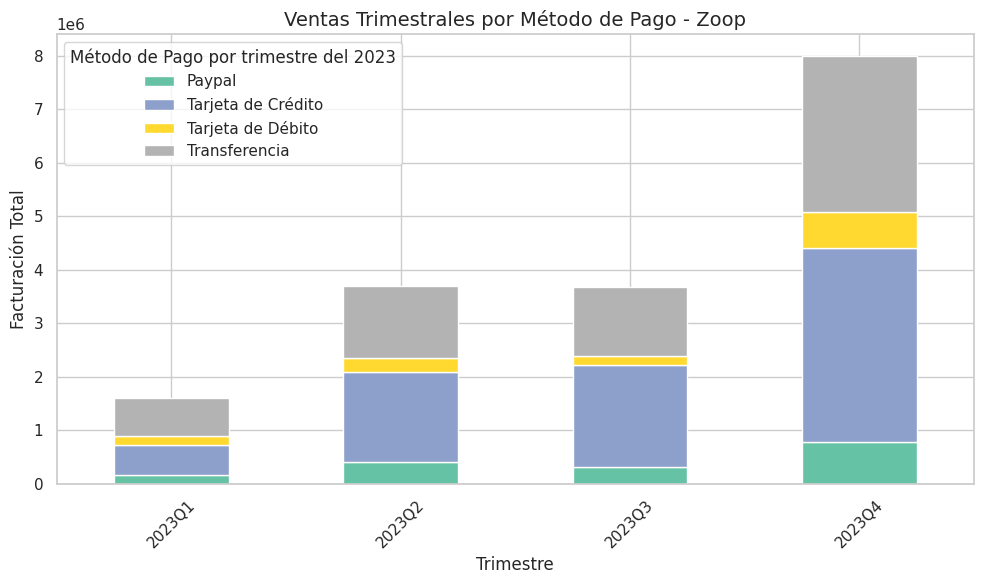

In [42]:
# Asegurar que la columna 'fecha' esté en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear una nueva columna con el trimestre (formato: "YYYY-TQ")
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)

# Agrupar por trimestre y método de pago, sumando la facturación
ventas_trimestrales = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# Crear gráfico de barras apiladas
ventas_trimestrales.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'  # Puedes cambiar la paleta si lo deseas
)

# Personalizar el gráfico
plt.title('Ventas Trimestrales por Método de Pago - Zoop', fontsize=14)
plt.xlabel('Trimestre')
plt.ylabel('Facturación Total')
plt.legend(title='Método de Pago por trimestre del 2023')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

El gráfico de columnas apiladas añade a la comparación entre períodos o categorías, la comparación también entre los datos de cada período/categoría. Es como si pusiéramos una "lupa" en cada columna y visualizáramos la composición de cada una de acuerdo con la variable deseada (aquí, las formas de pago).

Siéntete libre de formular algunas hipótesis sobre las ventas por trimestre combinadas con el tipo de pago y qué ideas podemos obtener de esta base de datos.


## **3.1 - Componiendo datos estáticos**

---

Inicialmente, presentaremos un ejemplo de cómo podemos utilizar la comparación de datos estáticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5ª Pregunta:** ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la proporción de usuarios(as) que están participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


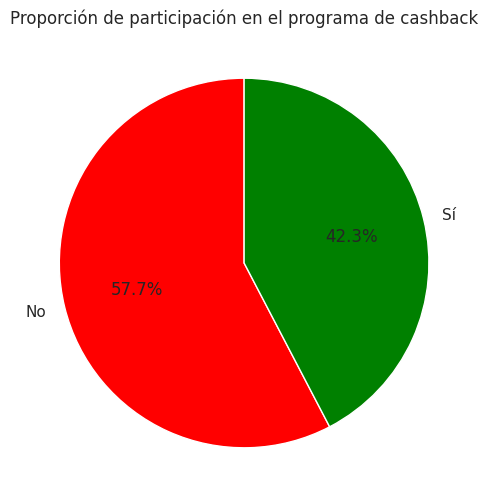

In [46]:
# Contar la cantidad de usuarios que participan y no participan en el programa de cashback
conteo_cashback = df['cashback'].value_counts()

# Crear gráfico con colores invertidos: 'No' = rojo, 'Sí' = verde
plt.figure(figsize=(6, 6))
plt.pie(
    conteo_cashback,
    labels=conteo_cashback.index,
    autopct='%1.1f%%',
    colors=['red', 'green'],  # Invertido: 'No' es rojo, 'Sí' es verde
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Proporción de participación en el programa de cashback')
plt.show()

#value_counts() cuenta cuántos valores distintos hay en la columna cashback (por ejemplo, cuántos "Sí" y cuántos "No").
#plt.pie() dibuja el gráfico de pastel:
#autopct='%1.1f%%' muestra los porcentajes con un decimal.
#colors define los colores de los segmentos.
#startangle=90 gira el inicio del gráfico para una presentación más clara.
#wedgeprops le da un borde blanco a cada segmento para mejorar la visualización.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¿Podrías utilizar el color rojo y mantener el azul y cambiar el gráfico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


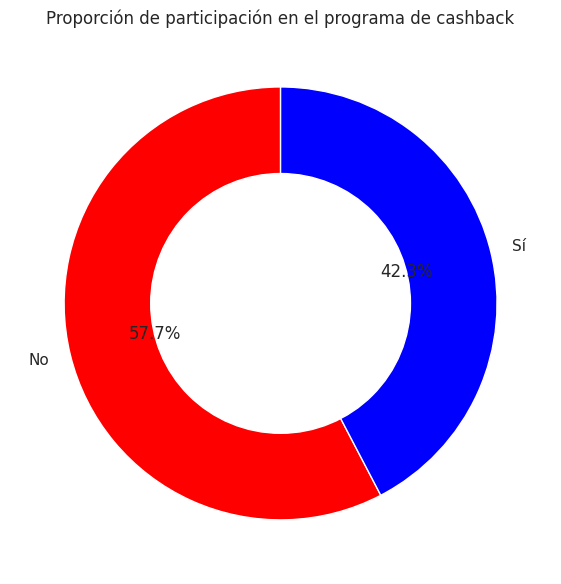

In [49]:


# Contar los valores
conteo_cashback = df['cashback'].value_counts()

# Crear gráfico tipo rosquilla con 'No' en rojo y 'Sí' en azul
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    conteo_cashback,
    labels=conteo_cashback.index,
    autopct='%1.1f%%',
    colors=['red', 'blue'],  # 'No' = rojo, 'Sí' = azul
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

# Dibujar un círculo blanco en el centro para que se vea como una rosquilla
centro = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centro)

plt.title('Proporción de participación en el programa de cashback')
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

¡Mira eso! Una vez más, la IA nos presentó una buena idea de qué gráfico aplicar para este caso, pero ¿notaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que había allí. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "sí" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificación en el visual.

¿Qué tal si experimentas hacer otros pedidos y ves cómo se comporta ChatGPT?

Hablando del gráfico, los gráficos de sectores son ideales para pocas categorías de datos, preferiblemente datos dicotómicos (2 categorías, como sí y no, gato y perro...). Representan la proporción de los datos de manera estática.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos más gráficos que serán importantes para la construcción del storytelling del informe de Zoop, según lo solicitado. Ahora, partiendo de la distribución de datos, vamos a analizar el perfil de los clientes y cómo evalúan sus compras en Zoop.

### **6ª Pregunta:** ¿Cómo están distribuidas las calificaciones de la compra? ¿Tenemos buenos números en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de las evaluaciones del público en relación con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relación con la compra que realizaron, que varían de 0 a 10 en números enteros.

Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear este gráfico.


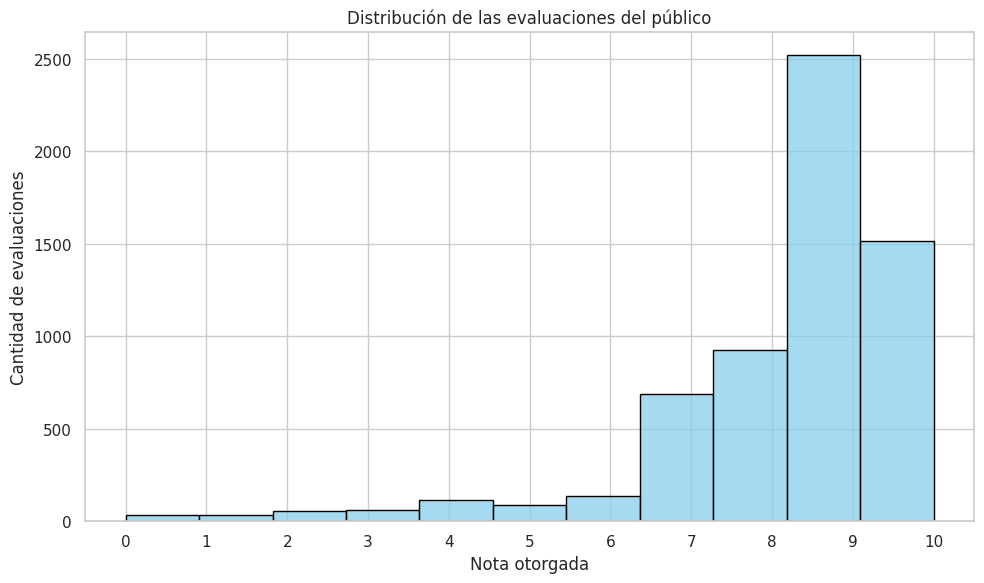

In [50]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear el histograma de la columna "nota"
plt.figure(figsize=(10, 6))
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue', edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de las evaluaciones del público')
plt.xlabel('Nota otorgada')
plt.ylabel('Cantidad de evaluaciones')
plt.xticks(range(0, 11))  # Mostrar las notas de 0 a 10

plt.tight_layout()
plt.show()

#bins=11: crea una barra para cada valor entero del 0 al 10.
#color='skyblue': define el color de las barras.
#edgecolor='black': pone bordes negros a las barras para mejorar la visibilidad.
#sns.set(style="whitegrid"): aplica un estilo limpio con líneas de fondo.

<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez más, no necesitamos especificar directamente el tipo de gráfico, ya que al mencionar la distribución de valores numéricos de una simple columna, ChatGPT logró interpretar y proporcionar el código para un histograma de columnas. Este gráfico es ideal para presentar la distribución de una muestra de datos o población. Cada columna aquí representa la frecuencia de repetición de un valor.

¿Te gustaría experimentar haciendo lo mismo solo con las edades?


### **7ª Pregunta:** ¿Cómo está distribuida nuestra audiencia por edad y sexo biológico? ¿Existe algún grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la distribución de nuestra audiencia por edad y sexo biológico.

En "df", tenemos las columnas:
* edad: edad de la persona que realizó la compra
* sexo_biologico: sexo biológico de la persona que realizó la compra, con datos categóricos

Deseamos crear una visualización que muestre la distribución de estos datos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


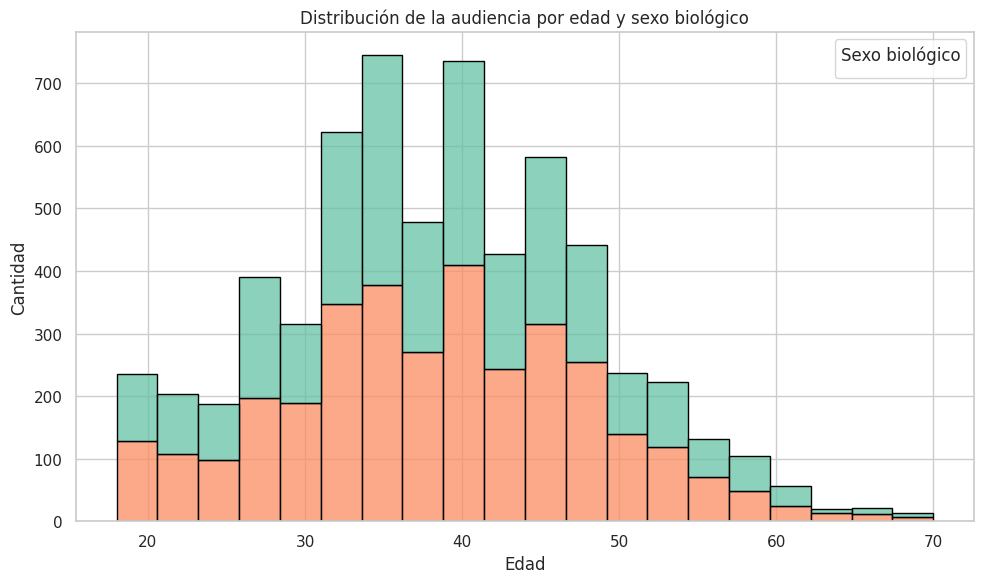

In [52]:
#Histograma segmentado por sexo biológico
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad', hue='sexo_biologico', bins=20, multiple='stack', palette='Set2', edgecolor='black')

# Personalizar
plt.title('Distribución de la audiencia por edad y sexo biológico')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(title='Sexo biológico')
plt.tight_layout()
plt.show()


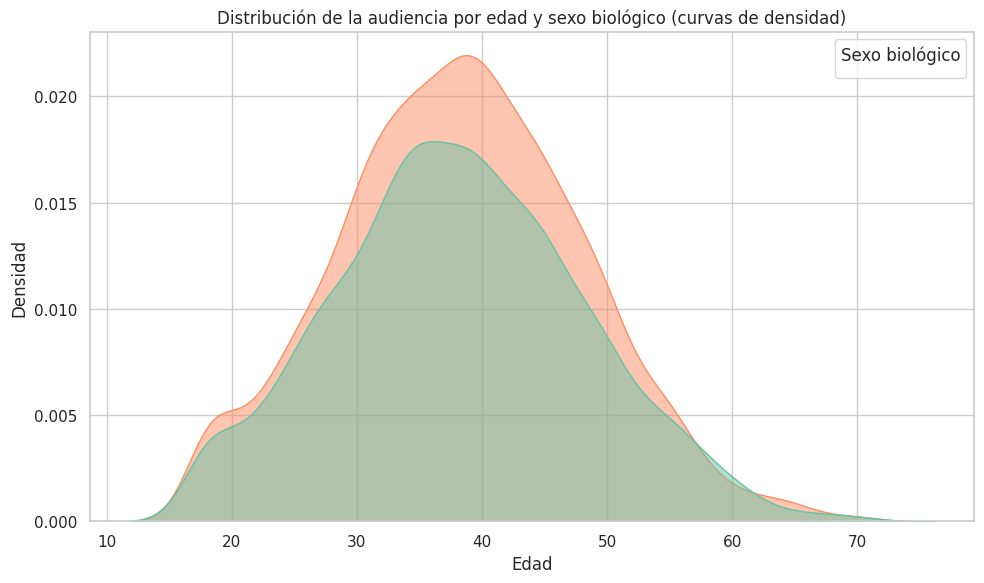

In [53]:
#Curvas de densidad por sexo biológico
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='edad', hue='sexo_biologico', fill=True, alpha=0.5, palette='Set2')

# Personalizar
plt.title('Distribución de la audiencia por edad y sexo biológico (curvas de densidad)')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend(title='Sexo biológico')
plt.tight_layout()
plt.show()

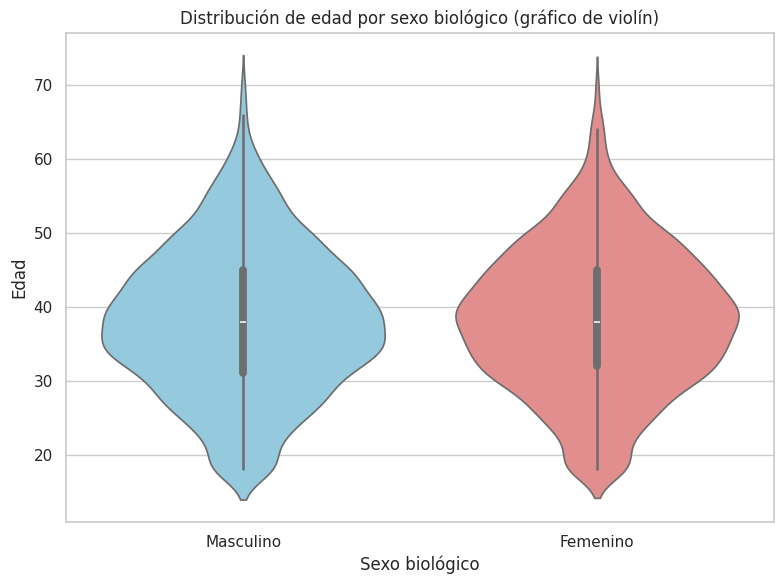

In [54]:
# Grafico de violín
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear gráfico de violín
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sexo_biologico', y='edad', palette={'Masculino': 'skyblue', 'Femenino': 'lightcoral'})

# Personalizar
plt.title('Distribución de edad por sexo biológico (gráfico de violín)')
plt.xlabel('Sexo biológico')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
El gráfico generado es poco práctico, ya que compila los datos del sexo biológico 'Masculino' y 'Femenino' en el gráfico de violín. Necesitamos darle una instrucción adicional a GPT para elegir un visual más adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gráfico. ¿Qué te parece cambiar a un boxplot?


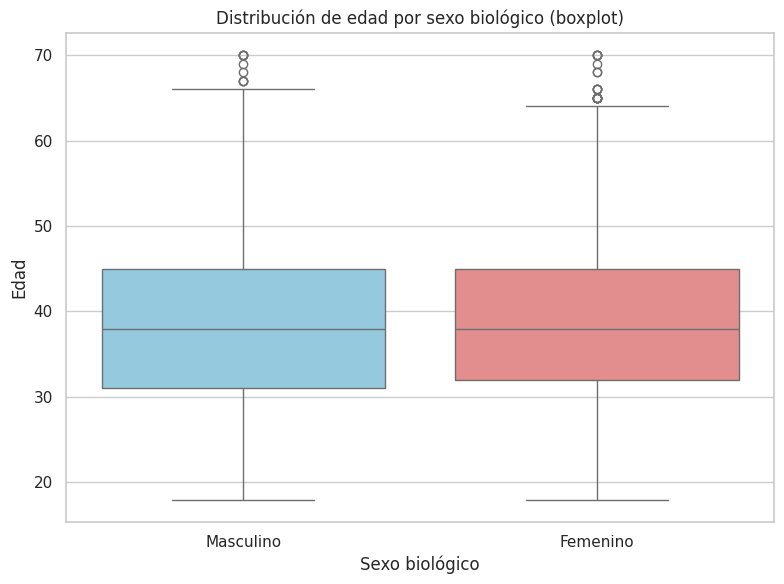

In [55]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sexo_biologico', y='edad', palette={'Masculino': 'skyblue', 'Femenino': 'lightcoral'})

# Personalizar
plt.title('Distribución de edad por sexo biológico (boxplot)')
plt.xlabel('Sexo biológico')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualización mejor para nuestros análisis.

El gráfico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de interés: valor máximo, mínimo, 1º cuartil (donde están situados el 25% de los datos), 2º cuartil o mediana (donde están situados el 50% de los datos) y 3º cuartil (donde están situados el 75% de los datos).

¿Recuerdas el `describe()`? Este gráfico presenta en un solo elemento gran parte de los datos que la función muestra en tabla.

Concluimos la 1ª versión de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicación de las técnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportación.


## HAGAMOS LO QUE HICIMOS - PARTE 3

""" Tenemos un DataFrame llamado "df" y queremos construir una visualización que presente la proporción de los(as) usuarios(as) que realizaron el pre-registro en Zoop Pay, la nueva solución de Zoop.

En "df", tenemos la columna "zoop_pay" que contiene estos datos. Construye un gráfico de dona donde el valor "Sí" reciba el color #2a9d8f y "No" el color #edede9.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. """

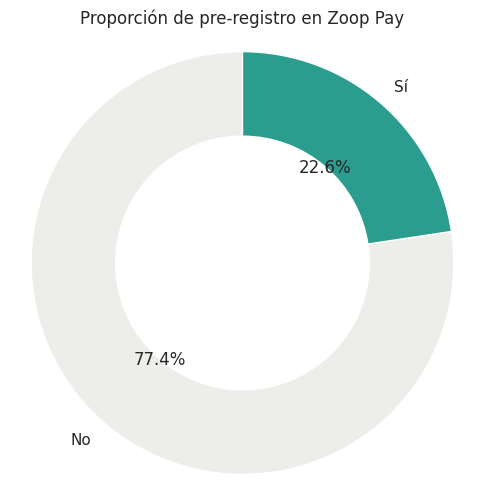

In [56]:
# Contar valores de la columna 'zoop_pay'
pre_registro = df['zoop_pay'].value_counts()

# Definir colores personalizados
colores = {'Sí': '#2a9d8f', 'No': '#edede9'}

# Crear gráfico de dona
plt.figure(figsize=(6, 6))
plt.pie(pre_registro,
        labels=pre_registro.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colores.get(label, '#cccccc') for label in pre_registro.index],
        wedgeprops={'width': 0.4})  # Para efecto "dona"

# Título y estilo
plt.title('Proporción de pre-registro en Zoop Pay')
plt.axis('equal')  # Asegura que el círculo sea perfecto
plt.show()


#### Parte 2

""" Tenemos un DataFrame llamado "df" y queremos construir una visualización que muestre la distribución de las edades de los(as) clientes por región.

En "df", tenemos las siguientes columnas:

region: región de la persona que realizó la compra.

edad: edad de la persona que realizó la compra.

Deseamos crear una visualización de boxplot que presente la distribución de estos datos. Coloca las edades en el eje x y las regiones en el eje y.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. """

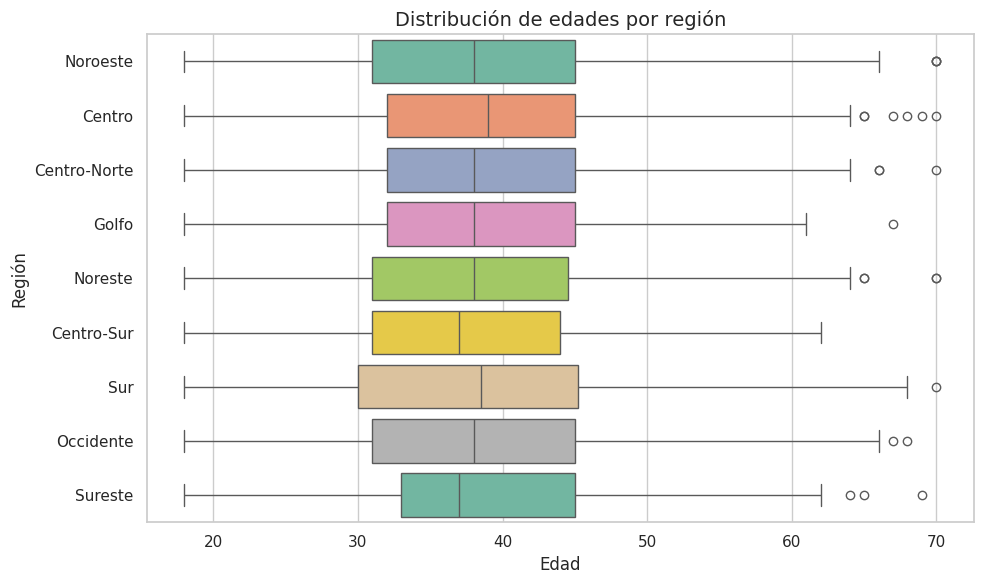

In [57]:
# Estilo visual
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear boxplot: eje x = edad, eje y = región
sns.boxplot(data=df, x='edad', y='region', palette='Set2')

# Título y etiquetas
plt.title('Distribución de edades por región', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Región')

# Mostrar gráfico
plt.tight_layout()
plt.show()

## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualización de datos, discutir cómo las personas perciben e interpretan la información visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visión humana en lo que respecta a la elección de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [58]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¿Por qué definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepción humana de los colores:**

Nuestro cerebro interpreta los colores de manera única, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepción humana para asegurar que la información se transmita de manera clara y eficaz. Además de seguir la identidad visual de Zoop, es decir, dar esa sensación de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser difíciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aquí seguiremos algunas directrices y recomendaciones para crear gráficos accesibles.

3. **IA vs. elección de colores:**

Mientras que la IA puede realizar tareas complejas, como análisis de datos y reconocimiento de patrones, aún no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aquí es donde entra nuestra intervención creativa y consideración humana.

4. **Experiencia visual:**

¿Las personas pueden entender la información transmitida por los gráficos? ¿Existe algún "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar técnicas para mejorar la experiencia visual, como el contraste adecuado, la elección cuidadosa de los colores de la paleta y el destaque de elementos clave.

¿Vamos ahora a sumergirnos en la práctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - Añadiendo etiquetas y rótulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender cómo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, títulos y etiquetas de los ejes.

Entonces, tomaremos el código de ese primer gráfico (Métodos de pago utilizados) y exploraremos estos cambios a través de la utilización de la IA.

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora llegó el momento de refinar nuestras visualizaciones. Comencemos con el primer gráfico que hicimos, el de los métodos de pago.

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, las columnas en el color ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Métodos de pago más utilizados en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas así como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tamaño 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gráfico deben ser suprimidos.

Además, es necesario mostrar el total de cada método de pago encima de cada columna, con el texto también en el color AZUL_1 y tamaño 12.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

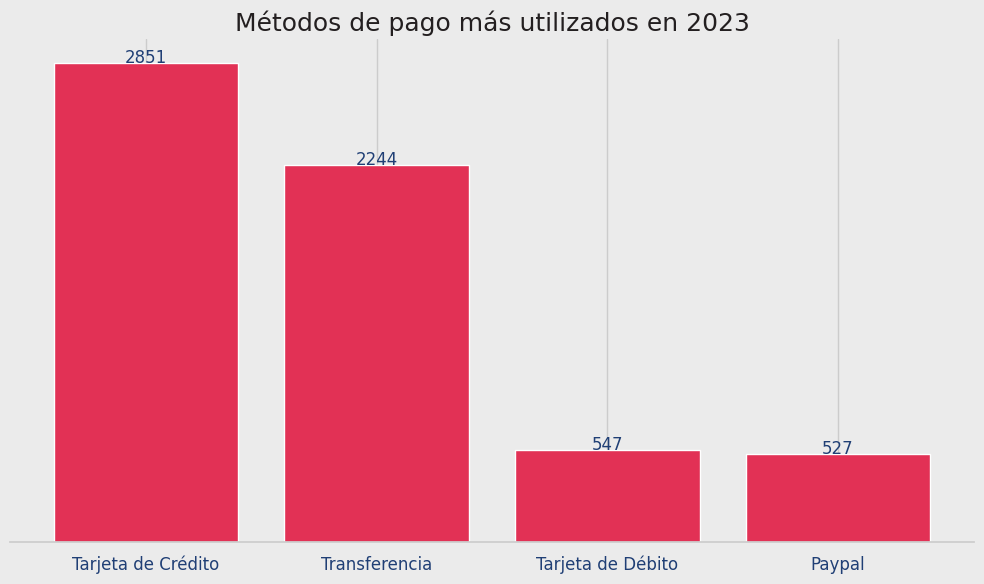

In [60]:
# Datos ejemplo (sustituye por los tuyos)
metodo_pago_counts = df['metodo_pago'].value_counts()

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Gráfico de barras
bars = ax.bar(
    metodo_pago_counts.index,
    metodo_pago_counts.values,
    color=ROJO_1
)

# Título
ax.set_title("Métodos de pago más utilizados en 2023", fontsize=18, color=GRIS_5)

# Estilo eje y
ax.set_ylabel("")
ax.set_yticks([])

# Estilo eje x
ax.set_xlabel("")
ax.set_xticklabels(metodo_pago_counts.index, fontsize=12, color=AZUL_1)
ax.tick_params(axis='x', labelsize=12)

# Eliminar bordes innecesarios
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Texto sobre barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        str(int(height)),
        ha='center',
        fontsize=12,
        color=AZUL_1
    )

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
¡Vaya! Parece otro gráfico, ¿verdad?

Eliminamos muchos elementos distractores y añadimos solo la información que nos interesaba. Además, cambiamos el diseño de un estado genérico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gráfico listo para ser utilizado, por ejemplo, en el informe de ventas.

Más adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aquí es entender las técnicas de storytelling y cómo combinarlas con la IA puede ser bastante útil.


## **4.3 - Añadiendo textos**

---


Ya hemos refinado uno de los gráficos en la etapa anterior. Ahora, vamos a traer ese gráfico, añadiendo un elemento más que puede ser importante para los análisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¡El gráfico quedó muy bien!

Ahora quiero añadir un texto dentro del área del gráfico, ¿vamos allá?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posición x=1.5 y y=2500, añade el siguiente texto con tamaño 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Crédito o Transferencia \npara el pago. Sería interesante considerar asociaciones con \nbancos para la creación de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

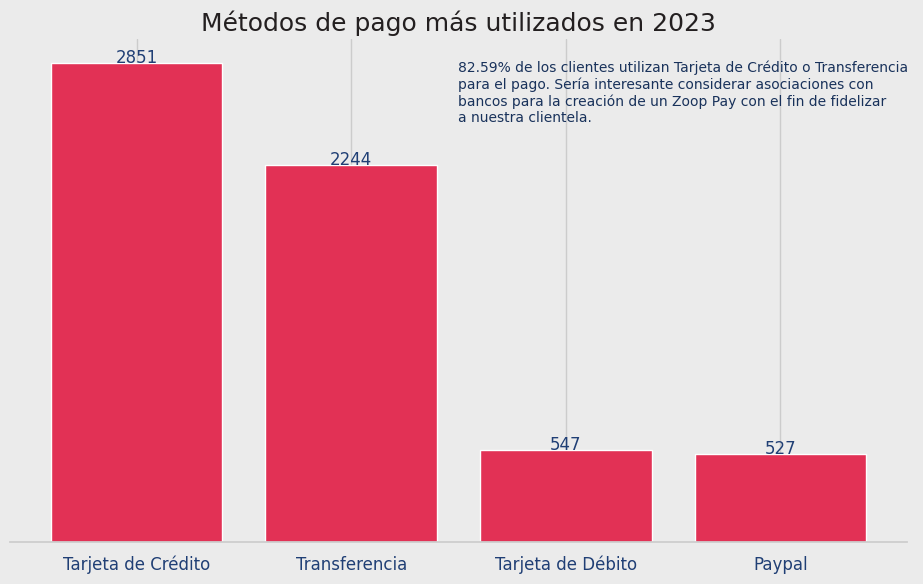

In [61]:
# Datos de ejemplo
metodo_pago_counts = df['metodo_pago'].value_counts()

# Cálculo del porcentaje
top2_sum = metodo_pago_counts.iloc[0] + metodo_pago_counts.iloc[1]
total_sum = metodo_pago_counts.sum()
porcentaje = (top2_sum / total_sum) * 100

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Barras
bars = ax.bar(
    metodo_pago_counts.index,
    metodo_pago_counts.values,
    color=ROJO_1
)

# Título
ax.set_title("Métodos de pago más utilizados en 2023", fontsize=18, color=GRIS_5)

# Estilo eje y
ax.set_ylabel("")
ax.set_yticks([])

# Estilo eje x
ax.set_xlabel("")
ax.set_xticklabels(metodo_pago_counts.index, fontsize=12, color=AZUL_1)
ax.tick_params(axis='x', labelsize=12)

# Eliminar bordes
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Etiquetas sobre barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        str(int(height)),
        ha='center',
        fontsize=12,
        color=AZUL_1
    )

# Añadir texto con análisis
ax.text(
    x=1.5,
    y=2500,
    s=f"{porcentaje:.2f}% de los clientes utilizan Tarjeta de Crédito o Transferencia \npara el pago. Sería interesante considerar asociaciones con \nbancos para la creación de un Zoop Pay con el fin de fidelizar \na nuestra clientela.",
    fontsize=10,
    color=AZUL_3
)

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el área útil para presentar una *idea* que tuvimos al describir los datos de los métodos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona más información a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¿Qué tal el uso de textos informativos, verdad? ¿Y si ahora añadimos otros elementos visuales a uno de nuestros gráficos?

Vamos a elegir ahora el gráfico de líneas (Ventas totales mensuales de Zoop) y aplicar una técnica más a él mediante el uso de la IA.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¿Vamos a explorar otro de los gráficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que generó el gráfico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar únicamente la biblioteca matplotlib con la creación del gráfico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en color GRIS_1, la línea en color AZUL_1 y el tamaño de la figura debe ser de (12, 6).

El título de la figura es "Ventas totales mensuales en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tamaño 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tamaño 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gráfico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¡Genial! Ahora que nuestro gráfico ya tiene la identidad visual, vamos a añadir algunos elementos visuales adicionales.

Dibuja 4 círculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5º, 8º, 11º y 12º puntos, respectivamente. A la izquierda de cada círculo enumera del 1 al 4.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos añadido 4 círculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hipótesis:

1. En mayo, tenemos una de las fechas más relevantes en ventas: el Día de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situación que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales períodos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de Año Nuevo, consideradas el período de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendación es investigar más a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los últimos 5 visuales de nuestro proyecto, vamos a hacer una pequeña modificación en los 2 primeros, convirtiéndolos en funciones, lo que facilitará más adelante cuando realicemos la exportación


# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los últimos 5 visuales de nuestro proyecto, haremos una pequeña modificación en los 2 primeros pasándolos a función, lo que facilitará más adelante cuando realicemos la exportación de los visuales.


### **Gráfico 1 - Métodos de pago más utilizados en 2023:**

### **Gráfico 2 - Total de ventas mensuales en 2023:**

Ahora que guardamos los 2 primeros gráficos en función, vamos a modificar uno más, **Facturación por categoría de producto en 2023**, utilizando las técnicas de storytelling que ya hemos aprendido.


### **Gráfico 3 - Facturación por categoría de producto en 2023:**


Vamos a continuar con los gráficos generados a lo largo de las clases, partiendo ahora del gráfico de facturación por categoría de producto aplicando las técnicas de storytelling que aprendimos aquí en el curso mediante el uso de la IA.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¿Vamos a proceder con otro gráfico? Ahora, vamos refinar el gráfico de facturación por categoría. Recuerda que este gráfico fue de barras horizontales.

El script original del gráfico es el siguiente:

```python

# 1. Calcular la facturación para cada compra
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por categoría y sumar la facturación
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

# 3. Ordenar los datos por facturación de mayor a menor
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

# 4. Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis',orient='h')

# 5. Añadir etiquetas y título
plt.title('Facturación por Categoría de Producto', fontsize=16)
plt.xlabel('Facturación (en MXN$)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)

# 6. Mostrar el gráfico
plt.show()
```
Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, las barras en el color AQUA_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Facturación por categoría de producto en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tamaño 12 con el color AZUL_1. Todas las bordes del gráfico deben ser suprimidas.

Además, es necesario mostrar el total de la facturación de cada categoría al lado derecho de cada barra, con el texto también en color AZUL_1 y tamaño 12.

También vamos a agregar un texto dentro del área del gráfico. Para ello, divide el valor de la 1ª barra entre la suma de todas las barras y conviértelo en un porcentaje, almacenándolo en la variable "porcentaje".

Ahora, en la posición x = 0.4e7 y y = 5, agrega el siguiente texto con tamaño 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden únicamente a las ventas de Electrónica.\nEsto equivale a casi el doble en relación con todas las demás categorías\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserción de las etiquetas, la modificación de los colores y añadimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcción y genera parte del código incluso sin más detalles.


## **5.2 - Ajustando los visuales de composición**

---


Ya hemos llegado a prácticamente la mitad de los gráficos refinados. Ahora, en este tema, ajustaremos 2 más aplicando las técnicas de storytelling que aprendimos aquí en el curso mediante el uso de la IA.


### **Gráfico 4 - Ventas por trimestre y método de pago:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gráfico de Ventas por Trimestre y Método de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gráfico es el siguiente:
```python

# 1. Crear una nueva columna 'trimestre' que extrae el trimestre de la columna 'fecha'
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 2. Agrupar los datos por trimestre y método de pago, sumando la facturación
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

# 3. Crear el gráfico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# 4. Añadir etiquetas y título
plt.title('Ventas por Trimestre y Método de Pago', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Facturación Total', fontsize=12)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# 5. Mostrar el gráfico
plt.legend(title='Método de Pago por trimestre de 2023')
plt.tight_layout()
plt.show()

```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1 y el tamaño de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El título de la figura es "Ventas por Trimestre y Método de Pago en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tamaño 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gráfico deben ser suprimidos(['top','bottom','left','right]).

También agrega una cuadrícula punteada en y.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gráfico de barras apiladas representando con colores más suaves los valores de los métodos de pago. Podemos notar cosas interesantes en este gráfico, como: el 2º y 4º trimestre siendo los momentos en que Zoop factura más con ventas, y también el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de crédito.


### **Gráfico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gráfico de sectores. Ya está bien encaminado, pero necesitamos realizar algunos ajustes.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gráfico de dona que produjimos para la proporción de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gráfico es el siguiente:

```python
plt.figure(figsize=(6, 6))
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%',
        colors=['#FF6666', '#66b3ff'], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.4})

# 3. Añadir título
plt.title('Proporción de Usuarios Participando en el Programa de Cashback', fontsize=16)

# 4. Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, el color de la porción de valor "No" igual a GRIS_3, el color de la porción de valor "Sí" igual a AZUL_1 y el tamaño de la figura debe ser de (6, 6).

El título de la figura es "¿Participan en el programa de cashback?" con un tamaño de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tamaño de 12, y los porcentajes deben estar en color BLANCO, también con un tamaño de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posición de los porcentajes dentro de la porción (`pctdistance`) debe ser de 0.8, el ángulo de inicio debe ser de 180 (`startangle`), y sin explosión de porciones.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gráfico, ahora el de dona, para representar la proporción de nuestros(as) clientes. Dimos mayor destaque al "Sí", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribución**

---


Ahora vamos con los últimos 2 gráficos antes de la exportación de los visuales. Vamos a aplicar más técnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gráfico 6 - Evaluaciones de los productos:**


Agora vamos para a distribuição das avaliações dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gráfico de la Distribución de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gráfico es el siguiente:

```python
# 1. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico de distribución (histograma)
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue')

# 3. Añadir etiquetas y título
plt.title('Distribución de las Calificaciones de las Compras', fontsize=16)
plt.xlabel('Calificación (0-10)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# 4. Mostrar el gráfico
plt.show()
```

Nuestro gráfico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, el color de las columnas en ROJO_1 y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de las evaluaciones de las compras en 2023" con tamaño 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tamaño 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tamaño 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) también deben tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detrás del gráfico (`ax.set_axisbelow(True)`).

Vamos a añadir una caja de anotación (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico. El texto de la anotación es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificación más común = {df['nota'].value_counts().idxmax()}\n Frecuencia más común = {df['nota'].value_counts().max()}"
```

en color AZUL_1. Añade la caja de anotación con el texto en la posición xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(8.7, 2250).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

¡Una novedad más en nuestro gráfico! Añadimos la función de caja de anotaciones, que es muy útil para proporcionar información sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gráfico 7 - Distribución del público por edad y sexo biológico:**


Ahora vamos con nuestra última visualización.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gráfico de boxplot de la Distribución de la Edad por Sexo Biológico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gráfico es el siguiente:

```python
# 1. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico de boxplot
sns.boxplot(x='sexo_biologico', y='edad', data=df, palette='Set2')

# 3. Añadir etiquetas y título
plt.title('Distribución de la Audiencia por Edad y Sexo Biológico', fontsize=16)
plt.xlabel('Sexo Biológico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# 4. Mostrar el gráfico
plt.show()
```

Nuestro gráfico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gráfico en el color GRIS_1, y el tamaño de la figura debe ser de (10, 6).

El título de la figura es "Distribución de la Edad por Sexo Biológico de los  clientes" con tamaño 18 y su color GRIS_5.

La columna 'sexo_biologico' está representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los rótulos del eje x y y (xticks y yticks) deben tener tamaño 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) también debe tener tamaño 12 con el color AZUL_1. Todos los bordes del gráfico deben ser suprimidos y la cuadrícula del eje y debe estar detrás del gráfico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotación (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del área del gráfico.

El texto de la primera anotación en color AZUL_1 es

```python
f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotación con el texto en la posición xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(-0.1, 45).

El texto de la segunda anotación en color AZUL_1 es

```python
f"Mínimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1º quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2º quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3º quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n Máximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotación con el texto en la posición xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posición xy=(0.9, 45).

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.


<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro último gráfico, creamos nuevamente el bloque de anotaciones señalando los valores que se muestran en un boxplot. Notamos que la distribución entre los clientes de sexo biológico masculino y femenino es bastante cercana, con solo un año de diferencia en el rango intercuartil (del 1º al 3º cuartil) en el caso del sexo biológico masculino. Zoop tiene en la mediana una clientela de 38 años de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¡Listo! Ahora que hemos finalizado los ajustes de todos los gráficos solicitados, generaremos un último código para exportar cada uno de los gráficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra última etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gráficos que generamos dentro de una función y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodo_pago()
*   ventas_mensuales()
*   facturacion_por_categoria()
*   ventas_por_trimestre()
*   proporcion_cashback()
*   distribucion_calificaciones()
*   box_plot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la función que genera el gráfico.

Utiliza el lenguaje Python para crear el código y no mostrar las imágenes.

¡Ahora es tu turno! ¿Qué tal descargar los gráficos y generar un informe con algunos insights y explicando los resultados?

¡Espero que hayas disfrutado este curso y saques el máximo provecho del contenido!